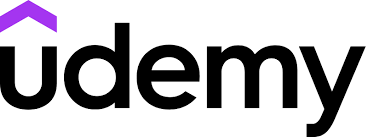

## Udemy courses project
### Project scope
+ EDA
+ Cleaning 
+ perproessing text
+ vectrized
+ model

### EDA

### Import Library

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [287]:
df=pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [288]:
df.shape

(3678, 12)

In [289]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [291]:
from datetime import datetime

df['published_timestamp'] = df['published_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())

In [292]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [293]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

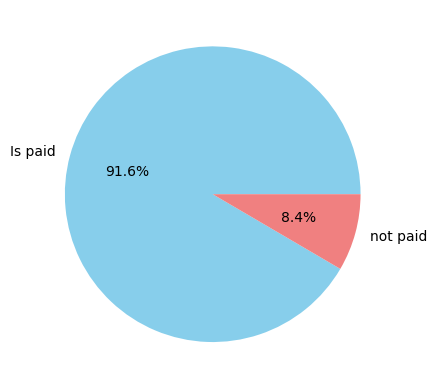

In [294]:
ip=df['is_paid'].value_counts()
labels={True:'Is paid',
  False:'not paid'}
ip.index=ip.index.map(labels)
colors = ['skyblue', 'lightcoral']  

plt.pie(ip,labels=ip.index, autopct='%1.1f%%', colors=colors)

plt.show()

In [295]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

df['Month'] = df['published_timestamp'].dt.month

In [296]:
result = df.groupby('subject').agg({
    'price': 'sum',
    'content_duration': 'median',
    'num_subscribers': 'sum',
    'num_lectures':'sum'
}).reset_index()

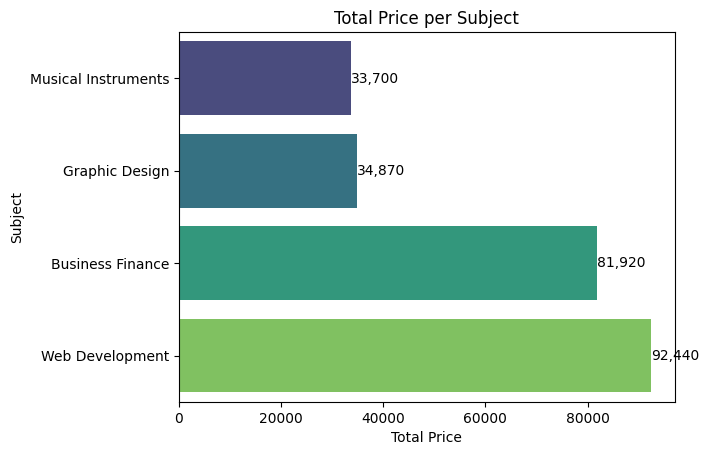

In [297]:
ax = sns.barplot(data=result, y='subject', x='price', order=result.sort_values('price').subject, palette='viridis')
plt.xlabel('Total Price')
plt.ylabel('Subject')
plt.title('Total Price per Subject')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

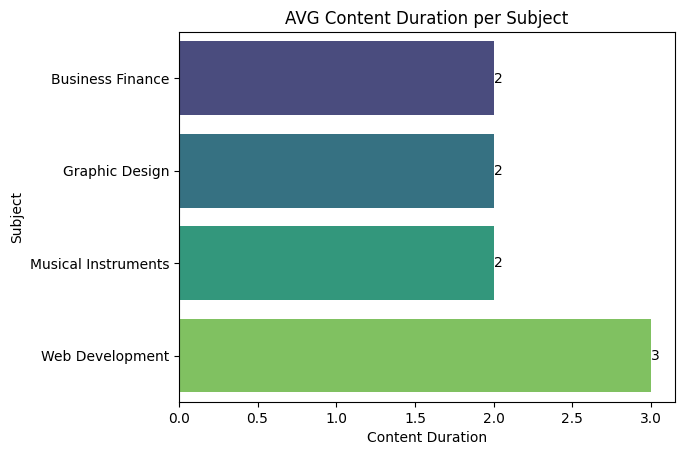

In [298]:
ax = sns.barplot(data=result, y='subject', x='content_duration', order=result.sort_values('content_duration').subject, palette='viridis')
plt.xlabel('Content Duration')
plt.ylabel('Subject')
plt.title('AVG Content Duration per Subject')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

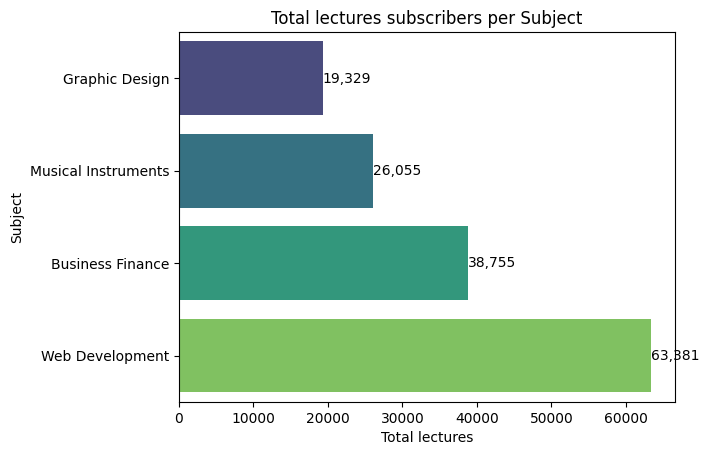

In [299]:
ax = sns.barplot(data=result, y='subject', x='num_lectures', order=result.sort_values('num_lectures').subject, palette='viridis')
plt.xlabel('Total lectures')
plt.ylabel('Subject')
plt.title('Total lectures subscribers per Subject')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

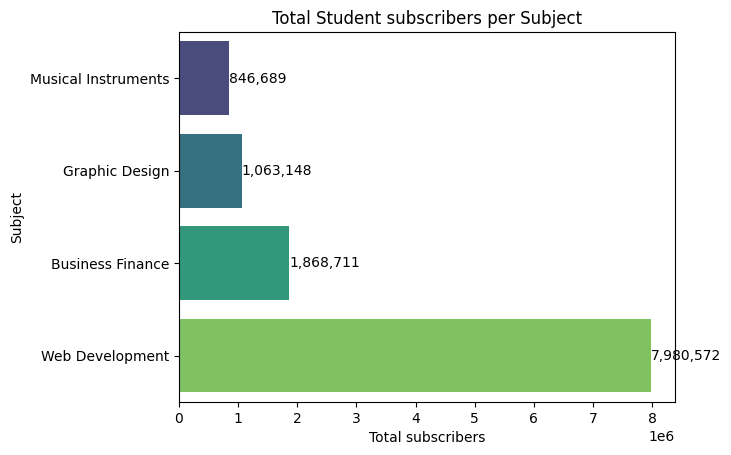

In [300]:
ax = sns.barplot(data=result, y='subject', x='num_subscribers', order=result.sort_values('num_subscribers').subject, palette='viridis')
plt.xlabel('Total subscribers')
plt.ylabel('Subject')
plt.title('Total Student subscribers per Subject')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

## Bulid Funcation to get insghiths for columns 
+ num_subscribe 
+ num_review 
+ num_lectures 
+ num_lectures 
+ contant_duration 
+ price

In [301]:
def more_info_to_more_insights(df, column_name):
    df = df.copy()
    max_value = df[column_name].max()
    more_info = df[df[column_name] == max_value]
    
    print(f"The course with the highest {column_name}:\n"
          f"Course ID: {more_info['course_id'].iloc[0]}\n"
          f"Course Title: {more_info['course_title'].iloc[0]}\n"
          f"URL: {more_info['url'].iloc[0]}\n"
          f"Is Paid: {more_info['is_paid'].iloc[0]}\n"
          f"Price: {more_info['price'].iloc[0]}\n"
          f"Number of Subscribers: {more_info['num_subscribers'].iloc[0]}\n"
          f"Number of Reviews: {more_info['num_reviews'].iloc[0]}\n"
          f"Number of Lectures: {more_info['num_lectures'].iloc[0]}\n"
          f"Level: {more_info['level'].iloc[0]}\n"
          f"Content Duration: {more_info['content_duration'].iloc[0]}\n"
          f"Published Timestamp: {more_info['published_timestamp'].iloc[0]}\n"
          f"Subject: {more_info['subject'].iloc[0]}\n"
          f"Month: {more_info['Month'].iloc[0]}")

+ insight for num_reviews

In [302]:
more_info_to_more_insights(df,'num_reviews')

The course with the highest num_reviews:
Course ID: 625204
Course Title: The Web Developer Bootcamp
URL: https://www.udemy.com/the-web-developer-bootcamp/
Is Paid: True
Price: 200
Number of Subscribers: 121584
Number of Reviews: 27445
Number of Lectures: 342
Level: All Levels
Content Duration: 43.0
Published Timestamp: 2015-11-02 00:00:00
Subject: Web Development
Month: 11


+ insight for num_lectures

In [303]:
more_info_to_more_insights(df,'num_lectures')

The course with the highest num_lectures:
Course ID: 79154
Course Title: Back to School Web Development and Programming Bundle
URL: https://www.udemy.com/back-to-school-web-development-and-programming-bundle/
Is Paid: True
Price: 200
Number of Subscribers: 18170
Number of Reviews: 117
Number of Lectures: 779
Level: Beginner Level
Content Duration: 44.5
Published Timestamp: 2013-08-19 00:00:00
Subject: Web Development
Month: 8


+ insight for content_duration

In [304]:
more_info_to_more_insights(df,'content_duration')

The course with the highest content_duration:
Course ID: 978576
Course Title: The Complete Figure Drawing Course HD
URL: https://www.udemy.com/the-complete-figure-drawing-course-hd/
Is Paid: True
Price: 50
Number of Subscribers: 1323
Number of Reviews: 136
Number of Lectures: 225
Level: Beginner Level
Content Duration: 78.5
Published Timestamp: 2016-10-11 00:00:00
Subject: Graphic Design
Month: 10


+ insight for num_subscribe

In [305]:
more_info_to_more_insights(df,'num_subscribers')

The course with the highest num_subscribers:
Course ID: 41295
Course Title: Learn HTML5 Programming From Scratch
URL: https://www.udemy.com/learn-html5-programming-from-scratch/
Is Paid: False
Price: 0
Number of Subscribers: 268923
Number of Reviews: 8629
Number of Lectures: 45
Level: All Levels
Content Duration: 10.5
Published Timestamp: 2013-02-14 00:00:00
Subject: Web Development
Month: 2


+ insight for price

In [306]:
more_info_to_more_insights(df,'price')

The course with the highest price:
Course ID: 1070968
Course Title: Ultimate Investment Banking Course
URL: https://www.udemy.com/ultimate-investment-banking-course/
Is Paid: True
Price: 200
Number of Subscribers: 2147
Number of Reviews: 23
Number of Lectures: 51
Level: All Levels
Content Duration: 1.5
Published Timestamp: 2017-01-18 00:00:00
Subject: Business Finance
Month: 1


In [307]:
r=df.groupby('Month')['price'].sum().reset_index()

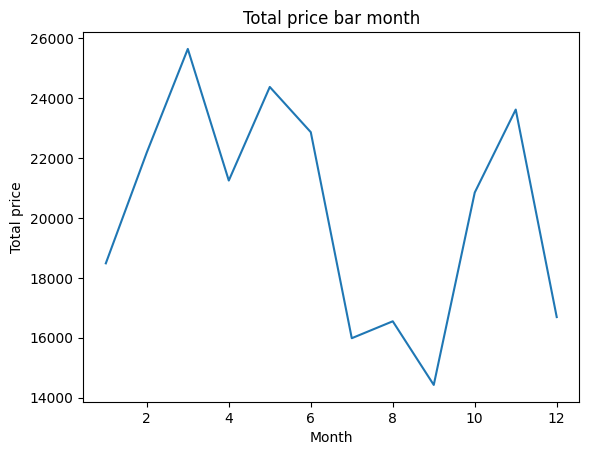

In [308]:
mp=sns.lineplot(data=r,x='Month',y='price')

for p in mp.patches:
    mp.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
    
plt.title('Total price bar month')
plt.ylabel('Total price')
plt.xlabel('Month')
plt.show()

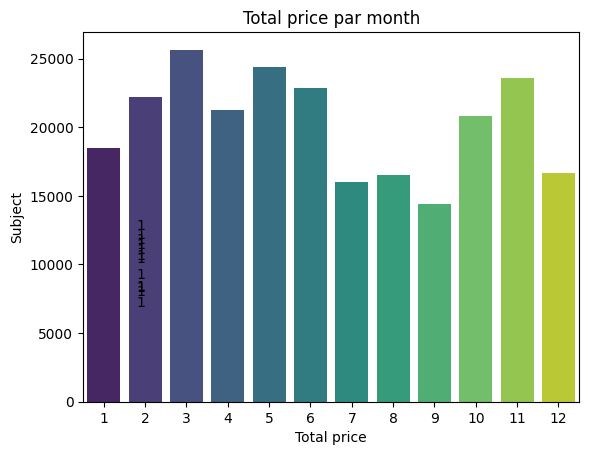

In [309]:
ax = sns.barplot(data=r, y='price', x='Month', palette='viridis')
plt.xlabel('Total price')
plt.ylabel('Subject')
plt.title('Total price par month')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

In [310]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [311]:
r3=df.groupby(['level','subject'])['num_subscribers'].sum().reset_index().sort_values('num_subscribers')

In [312]:
r3

,level,subject,num_subscribers
9,Expert Level,Graphic Design,1008
10,Expert Level,Musical Instruments,5431
11,Expert Level,Web Development,13611
8,Expert Level,Business Finance,30146
13,Intermediate Level,Graphic Design,58051
14,Intermediate Level,Musical Instruments,84058
12,Intermediate Level,Business Finance,144350
5,Beginner Level,Graphic Design,315757
2,All Levels,Musical Instruments,328170
6,Beginner Level,Musical Instruments,429030


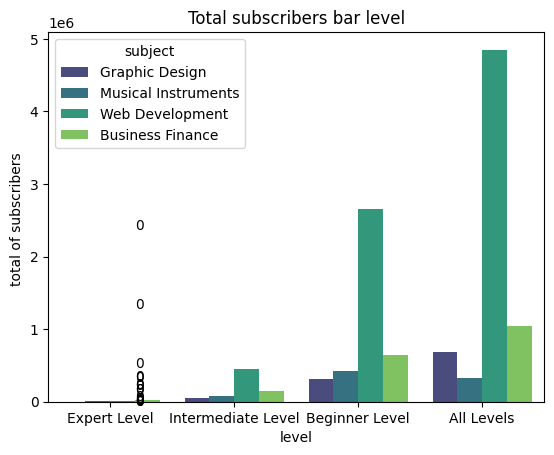

In [313]:
ns = sns.barplot(data=r3, x='level', y='num_subscribers', palette='viridis',hue='subject')
plt.xlabel('level')
plt.ylabel('total of subscribers ')
plt.title('Total subscribers bar level')
for p in ns.patches:
    ns.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black')
plt.show()

In [314]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,3


In [315]:
df['year']= df['published_timestamp'].dt.year
subject_by_year = df.groupby('year')['subject'].value_counts().reset_index(level=0).rename(columns={'subject': 'subject count'}, index={'index': 'Subject'})
subject_by_year

,year,count
subject,,
Web Development,2011,5
Web Development,2012,19
Musical Instruments,2012,10
Graphic Design,2012,10
Business Finance,2012,6
Business Finance,2013,84
Web Development,2013,56
Musical Instruments,2013,39
Graphic Design,2013,23


In [316]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Pie(labels=df.level.value_counts().index,
                             values=df.level.value_counts().values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', 
                  title='Course Count by Level of Courses')
fig.show()

In [317]:
import plotly.express as px

fig = px.histogram(df, x="level", title='Course Count by Level of Courses')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [318]:
fig = px.histogram(df, x= 'content_duration', title='Durations of UDEMY Courses')

fig.show()

In [319]:
fig = px.histogram(df, x= 'price', title='prices of courses ')

fig.show()

In [320]:
fig = go.Figure(data=[go.Pie(labels=df.subject.value_counts().index, values=df.subject.value_counts().values, 
                             textinfo='label+percent', hole=.3)])
fig.show()

In [321]:
fig = go.Figure(data=[go.Pie(labels=df.level.value_counts().index,
                             values=df.level.value_counts().values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', 
                  title='Course Count by Level of Courses')
fig.show()

#### top 15 courses paid

In [322]:
top_15_paid_courses = df[df['price']!=0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
top_15_paid_courses

,course_title,year,subject,num_subscribers
3230,The Web Developer Bootcamp,2015,Web Development,121584
3232,The Complete Web Developer Course 2.0,2016,Web Development,114512
2619,Learn Javascript & JQuery From Scratch,2013,Web Development,84897
3247,JavaScript: Understanding the Weird Parts,2015,Web Development,79612
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,Musical Instruments,75499
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,Web Development,73783
2701,Become a Web Developer from Scratch,2011,Web Development,69186
3246,Learn and Understand AngularJS,2014,Web Development,59361
3251,Learn and Understand NodeJS,2015,Web Development,58208
2662,The Complete HTML & CSS Course - From Novice T...,2015,Web Development,57422


In [323]:
fig = px.bar(top_15_paid_courses, x= 'num_subscribers', y='course_title', hover_data = top_15_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#### Almost all of the top 15 paid courses are from Web Development area, except one course in Musical Instruments area.


### top 15 coure free

In [324]:
top_15_free_courses = df[df['price']==0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
top_15_free_courses

,course_title,year,subject,num_subscribers
2827,Learn HTML5 Programming From Scratch,2013,Web Development,268923
3032,Coding for Entrepreneurs Basic,2013,Web Development,161029
2783,Build Your First Website in 1 Week with HTML5 ...,2014,Web Development,120291
1896,Free Beginner Electric Guitar Lessons,2012,Musical Instruments,101154
2589,Web Design for Web Developers: Build Beautiful...,2015,Web Development,98867
3289,Practical PHP: Master the Basics and Code Dyna...,2014,Web Development,83737
3665,Beginner Photoshop to HTML5 and CSS3,2012,Web Development,73110
2782,Web Development By Doing: HTML / CSS From Scratch,2013,Web Development,72932
3325,HTML and CSS for Beginners - Build a Website &...,2015,Web Development,70773
492,Bitcoin or How I Learned to Stop Worrying and ...,2013,Business Finance,65576


In [325]:
fig=px.bar(top_15_free_courses,x='num_subscribers',y='course_title', hover_data = top_15_free_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [326]:
top_15_course_review=df[['course_title','year','subject','is_paid','num_reviews']].sort_values(by='num_reviews', ascending=False).head(15)
top_15_course_review

,course_title,year,subject,is_paid,num_reviews
3230,The Web Developer Bootcamp,2015,Web Development,True,27445
3232,The Complete Web Developer Course 2.0,2016,Web Development,True,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,Web Development,True,19649
3247,JavaScript: Understanding the Weird Parts,2015,Web Development,True,16976
3254,Modern React with Redux,2015,Web Development,True,15117
3246,Learn and Understand AngularJS,2014,Web Development,True,11580
3251,Learn and Understand NodeJS,2015,Web Development,True,11123
2827,Learn HTML5 Programming From Scratch,2013,Web Development,False,8629
3228,Angular 2 with TypeScript for Beginners: The P...,2016,Web Development,True,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,Musical Instruments,True,7676


In [327]:
fig=px.bar(top_15_course_review,x='num_reviews',y='course_title', hover_data = top_15_free_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [328]:
top_15_price = df[['course_title','year','subject','num_subscribers', 'price']].sort_values(by=['price','num_subscribers'], ascending=False).head(15)

top_15_price

,course_title,year,subject,num_subscribers,price
3230,The Web Developer Bootcamp,2015,Web Development,121584,200
3232,The Complete Web Developer Course 2.0,2016,Web Development,114512,200
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,Musical Instruments,75499,200
1213,Photoshop for Entrepreneurs - Design 11 Practi...,2016,Graphic Design,36288,200
3233,Ultimate Web Designer & Developer Course: Buil...,2015,Web Development,33788,200
3206,PHP for Beginners -Become a PHP Master - Proje...,2015,Web Development,28880,200
2621,The Ultimate Web Developer How To Guide,2015,Web Development,24861,200
1526,How To Make Graphics For A Website,2014,Graphic Design,24857,200
3117,1 Hour JavaScript,2013,Web Development,22999,200
2755,Become A Web Developer And Seller - Build Webs...,2013,Web Development,21730,200


In [329]:
fig = px.bar(top_15_price , x= 'num_subscribers', y='course_title', hover_data = top_15_price[['price','year']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Recommendation System

In [330]:
! pip install neattext

In [331]:
import neattext.functions as nfx
# Load ML/Rc Pkgs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [332]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [333]:
df['clean_course_title']=df['course_title'].apply(nfx.remove_stopwords)

In [334]:
df['clean_course_title']=df['clean_course_title'].apply(nfx.remove_special_characters)

In [335]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Month,year,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,1,2017,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,3,2017,Complete GST Course Certification Grow Practice


In [336]:
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3674,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3675,Learn and Build using Polymer,Learn Build Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [337]:
## vectroize our text
count_vect=CountVectorizer()
cv_mat=count_vect.fit_transform(df['clean_course_title'])

In [338]:
# sparese
cv_mat

<3678x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [339]:
#Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [340]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())

In [341]:
df_cv_words.head(3)

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
#Cosine similarity matrix 
cosine_sim_mat=cosine_similarity(cv_mat)

In [343]:
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [344]:
# sns.heatmap(cosine_sim_mat[0:10],annot=True)

In [345]:
# Get course id/index
course_indices=pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [346]:
course_indeces

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [347]:
idx=course_indices['How To Maximize Your Profits Trading Options']

In [348]:
idx

4

In [349]:
scores=list(enumerate(cosine_sim_mat[idx]))

In [350]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


In [351]:
sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)

In [352]:
sorted_scores[1:]

[(408, 0.5773502691896258),
 (43, 0.5669467095138407),
 (94, 0.5303300858899106),
 (136, 0.5303300858899106),
 (193, 0.5303300858899106),
 (442, 0.5303300858899106),
 (801, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (95, 0.5),
 (328, 0.5),
 (376, 0.5),
 (512, 0.5),
 (645, 0.5),
 (736, 0.5),
 (944, 0.5),
 (987, 0.5),
 (809, 0.45226701686664544),
 (66, 0.4472135954999579),
 (220, 0.4472135954999579),
 (232, 0.4472135954999579),
 (367, 0.4472135954999579),
 (437, 0.4472135954999579),
 (461, 0.4472135954999579),
 (764, 0.4472135954999579),
 (827, 0.4472135954999579),
 (397, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (105, 0.4082482904638631),
 (158, 0.4082482904638631),
 (165, 0.4082482904638631),
 (203, 0.4082482904638631),
 (293, 0.4082482904638631),
 (351, 0.4082482904638631),
 (400, 0.4082482904638631),
 (409, 0.4082482904638631),
 (800, 0.4082482904638631),
 (950, 0.408248

In [353]:
# selected coures indices
selected_course_indices=[i[0] for i in sorted_scores[1:]]

In [354]:
selected_course_indices

[408,
 43,
 94,
 136,
 193,
 442,
 801,
 11,
 59,
 68,
 71,
 95,
 328,
 376,
 512,
 645,
 736,
 944,
 987,
 809,
 66,
 220,
 232,
 367,
 437,
 461,
 764,
 827,
 397,
 49,
 54,
 72,
 85,
 105,
 158,
 165,
 203,
 293,
 351,
 400,
 409,
 800,
 950,
 953,
 998,
 8,
 33,
 35,
 100,
 107,
 111,
 155,
 184,
 361,
 432,
 508,
 648,
 796,
 897,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 147,
 151,
 198,
 344,
 359,
 364,
 375,
 414,
 449,
 469,
 564,
 626,
 706,
 792,
 861,
 906,
 951,
 960,
 1019,
 1108,
 1111,
 1130,
 1132,
 1137,
 1147,
 62,
 313,
 616,
 681,
 20,
 36,
 199,
 396,
 707,
 97,
 106,
 116,
 300,
 385,
 401,
 466,
 475,
 477,
 536,
 581,
 646,
 650,
 743,
 775,
 821,
 831,
 842,
 860,
 880,
 945,
 959,
 1001,
 1085,
 1167,
 254,
 67,
 77,
 78,
 84,
 88,
 133,
 142,
 162,
 206,
 282,
 297,
 318,
 348,
 354,
 392,
 406,
 427,
 446,
 491,
 498,
 531,
 557,
 568,
 596,
 692,
 694,
 762,
 767,
 813,
 918,
 1008,
 1017,
 1131,
 18,
 50,
 79,
 90,
 139,
 185,
 186,
 194,
 219,
 231,
 246,
 27

In [355]:
# selected coures scores
selected_course_scores=[i[1] for i in sorted_scores[1:]]

In [356]:
recommended_result=df['course_title'].iloc[selected_course_indices]

In [357]:
rec_df=pd.DataFrame(recommended_result)

In [358]:
rec_df['similarity_scores']=selected_course_scores

In [359]:
rec_df

,course_title,similarity_scores
408,Trading Options Basics,0.577350
43,Options Trading - How to Win with Weekly Options,0.566947
94,Intermediate Options trading concepts for Stoc...,0.530330
136,Forex Trading with Fixed 'Risk through Options...,0.530330
193,Trading Options For Consistent Returns: Option...,0.530330
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3674,How To Design A WordPress Website With No Codi...,0.000000
3675,Learn and Build using Polymer,0.000000
3676,CSS Animations: Create Amazing Effects on Your...,0.000000


In [360]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indeces[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)

In [362]:
recommend_course('Trading Options Basics',20)

,course_title,similarity_scores
95,Options Trading 101: The Basics,0.866025
193,Trading Options For Consistent Returns: Option...,0.816497
861,Basics of Trading,0.816497
66,Options Trading Basics (3-Course Bundle),0.774597
800,Trading: Basics of Trading for Beginners,0.707107
953,Options Basics & Trading With Small Capital! -...,0.707107
43,Options Trading - How to Win with Weekly Options,0.654654
94,Intermediate Options trading concepts for Stoc...,0.612372
136,Forex Trading with Fixed 'Risk through Options...,0.612372
442,The Advantages of ETF Options and Index Option...,0.612372


![](https://media3.giphy.com/media/3oEdva9BUHPIs2SkGk/giphy.gif?cid=6c09b952x3y56v68296o40eoc7wuswlpayb3o7fssn8p1u2t&ep=v1_gifs_search&rid=giphy.gif&ct=g)